[![Fixel Algorithms](https://i.imgur.com/AqKHVZ0.png)](https://fixelalgorithms.gitlab.io/)

# Pre Trained Computer Vision Models

> Notebook by:
> - Royi Avital RoyiAvital@fixelalgorithms.com

## Revision History

| Version | Date       | User        |Content / Changes                                                   |
|---------|------------|-------------|--------------------------------------------------------------------|
| 1.0.000 | 26/05/2024 | Royi Avital | First version                                                      |

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FixelAlgorithmsTeam/FixelCourses/blob/master/AIProgram/2024_02/0091DeepLearningPreTrainedModels.ipynb)

In [5]:
# Import Packages

# General Tools
import numpy as np
import scipy as sp
import pandas as pd

# Machine Learning

# Deep Learning
import torch
import torch.nn            as nn
import torch.nn.functional as F
from torch.utils.tensorboard import SummaryWriter
import torchinfo
import torchvision
from torchvision.transforms import v2 as TorchVisionTrns

# Image Processing & Computer Vision
import skimage as ski

# Miscellaneous
import copy
from enum import auto, Enum, unique
import json
import math
import os
from platform import python_version
import random
import time
import urllib

# Typing
from typing import Any, Callable, Dict, Generator, List, Optional, Self, Set, Tuple, Union

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Jupyter
from IPython import get_ipython
from IPython.display import HTML, Image
from IPython.display import display
from ipywidgets import Dropdown, FloatSlider, interact, IntSlider, Layout, SelectionSlider
from ipywidgets import interact

## Notations

* <font color='red'>(**?**)</font> Question to answer interactively.
* <font color='blue'>(**!**)</font> Simple task to add code for the notebook.
* <font color='green'>(**@**)</font> Optional / Extra self practice.
* <font color='brown'>(**#**)</font> Note / Useful resource / Food for thought.

Code Notations:

```python
someVar    = 2; #<! Notation for a variable
vVector    = np.random.rand(4) #<! Notation for 1D array
mMatrix    = np.random.rand(4, 3) #<! Notation for 2D array
tTensor    = np.random.rand(4, 3, 2, 3) #<! Notation for nD array (Tensor)
tuTuple    = (1, 2, 3) #<! Notation for a tuple
lList      = [1, 2, 3] #<! Notation for a list
dDict      = {1: 3, 2: 2, 3: 1} #<! Notation for a dictionary
oObj       = MyClass() #<! Notation for an object
dfData     = pd.DataFrame() #<! Notation for a data frame
dsData     = pd.Series() #<! Notation for a series
hObj       = plt.Axes() #<! Notation for an object / handler / function handler
```

### Code Exercise

 - Single line fill

 ```python
 vallToFill = ???
 ```

 - Multi Line to Fill (At least one)

 ```python
 # You need to start writing
 ????
 ```

 - Section to Fill

```python
#===========================Fill This===========================#
# 1. Explanation about what to do.
# !! Remarks to follow / take under consideration.
mX = ???

???
#===============================================================#
```

In [6]:
# Configuration
# %matplotlib inline

seedNum = 512
np.random.seed(seedNum)
random.seed(seedNum)

# Matplotlib default color palette
lMatPltLibclr = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
# sns.set_theme() #>! Apply SeaBorn theme

runInGoogleColab = 'google.colab' in str(get_ipython())

# Improve performance by benchmarking
torch.backends.cudnn.benchmark = True

# Reproducibility (Per PyTorch Version on the same device)
# torch.manual_seed(seedNum)
# torch.backends.cudnn.deterministic = True
# torch.backends.cudnn.benchmark     = False #<! Makes things slower


In [7]:
# Constants

FIG_SIZE_DEF    = (8, 8)
ELM_SIZE_DEF    = 50
CLASS_COLOR     = ('b', 'r')
EDGE_COLOR      = 'k'
MARKER_SIZE_DEF = 10
LINE_WIDTH_DEF  = 2

DATA_FOLDER_PATH    = 'Data'
TENSOR_BOARD_BASE   = 'TB'

# Based on newer batches of ImageNet data set (Not in the 1.2M for training)
L_IMG_URL = ['https://farm3.static.flickr.com/2278/2096798034_bfe45b11ee.jpg',
             'https://static.flickr.com/48/116936482_7458bb78c1.jpg',
             'https://farm4.static.flickr.com/3001/2927732866_3bd24c2f98.jpg',
             'https://farm4.static.flickr.com/3018/2990729221_aabd592245.jpg',
             'https://farm4.static.flickr.com/3455/3372433349_0444709b8f.jpg',
             ]

IMAGE_NET_CLS_IDX_URL = r'https://raw.githubusercontent.com/FixelAlgorithmsTeam/FixelCourses/master/DataSets/ImageNet1000ClassIndex.json'


In [8]:
# Download Auxiliary Modules for Google Colab
if runInGoogleColab:
    !wget https://raw.githubusercontent.com/FixelAlgorithmsTeam/FixelCourses/master/AIProgram/2024_02/DataManipulation.py
    !wget https://raw.githubusercontent.com/FixelAlgorithmsTeam/FixelCourses/master/AIProgram/2024_02/DataVisualization.py
    !wget https://raw.githubusercontent.com/FixelAlgorithmsTeam/FixelCourses/master/AIProgram/2024_02/DeepLearningPyTorch.py

In [9]:
# Courses Packages
import sys
sys.path.append('/home/vlad/utils')
from DataVisualization import PlotLabelsHistogram, PlotMnistImages
from DeepLearningPyTorch import NNMode
from DeepLearningPyTorch import RunEpoch


In [ ]:
# General Auxiliary Functions




## Pre Defined Models

Every Deep Learning framework offers _Pre Defined models_.  
Loading them can be done in 2 flavors:

1. Model Definition  
   Loading only the model definition of the architecture.  
2. Model Definition with Pre Trained Weights  
   Loading the model with a pre trained weights on some dataset.

The option (1) is used for a vanilla training of the model.  
The option (2) is used in production or for _Transfer Learning_.

This notebooks presents:

 * Loading a model with weights trained on _ImageNet 1000_.
 * Applying the model on random images from [Flickr](https://www.flickr.com).  
   The files are defined in `L_IMG_URL`.


</br>

* <font color='brown'>(**#**)</font> PyTorch Vision (`TorchVision`) offers a set of pretrained models in [Models and Pre Trained Weights](https://pytorch.org/vision/stable/models.html).
* <font color='brown'>(**#**)</font> There are other sites dedicated to models. It is common to use _Model Zoo_. Searching for `PyTorch Model Zoo` will yield more options.
* <font color='brown'>(**#**)</font> Many papers comes with links to a repository with the model definition and weights.  
  See [YOLOv9: Learning What You Want to Learn Using Programmable Gradient Information](https://arxiv.org/abs/2402.13616).
* <font color='brown'>(**#**)</font> Some repositories only offer the model definition.  
  See [Implementation of MobileNet in PyTorch](https://github.com/jmjeon94/MobileNet-Pytorch).
* <font color='brown'>(**#**)</font> For CNN models, the concept of [_Receptive Field_](https://en.wikipedia.org/wiki/Receptive_field) is fundamental.  
  See [Understanding the Receptive Field of Deep Convolutional Networks](https://theaisummer.com/receptive-field).

In [10]:
# Parameters

# Data
imgSize = 224


# Model
# Name, Constructor, Weights
lModels = [('AlexNet', torchvision.models.alexnet, torchvision.models.AlexNet_Weights.IMAGENET1K_V1),
           ('VGG16', torchvision.models.vgg16, torchvision.models.VGG16_Weights.IMAGENET1K_V1),
           ('InceptionV3', torchvision.models.inception_v3, torchvision.models.Inception_V3_Weights.IMAGENET1K_V1),
           ('ResNet152', torchvision.models.resnet152, torchvision.models.ResNet152_Weights.IMAGENET1K_V2),
           ]

# Training

# Visualization


## Generate / Load Data



In [11]:
# Load Data

numImg = len(L_IMG_URL)

# Loads the Classes
fileId      = urllib.request.urlopen(IMAGE_NET_CLS_IDX_URL)
dClsData    = json.loads(fileId.read())
lClasses    = [dClsData[str(k)][1] for k in range(1000)]

### Plot the Data

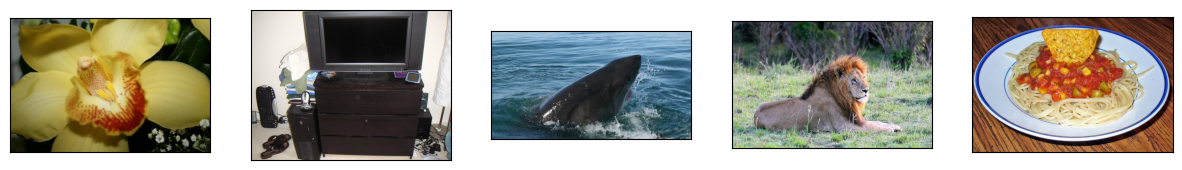

In [12]:
# Plot the Data

hF, vHa = plt.subplots(nrows = 1, ncols = numImg, figsize = (3 * numImg, 6))

for ii, hA in enumerate(vHa.flat):
    mI = ski.io.imread(L_IMG_URL[ii])
    hA.imshow(mI)
    hA.tick_params(axis = 'both', left = False, top = False, right = False, bottom = False, 
                   labelleft = False, labeltop = False, labelright = False, labelbottom = False)
    hA.grid(False)


* <font color='red'>(**?**)</font> Do images have the same dimensions? What will be the effect?

In [13]:
# Plot Classes

lClasses[:15]

['tench',
 'goldfish',
 'great_white_shark',
 'tiger_shark',
 'hammerhead',
 'electric_ray',
 'stingray',
 'cock',
 'hen',
 'ostrich',
 'brambling',
 'goldfinch',
 'house_finch',
 'junco',
 'indigo_bunting']

## Show the Models

This section shows the models using `torchinfo`.  

* <font color='brown'>(**#**)</font> Since the information is limited to the architecture, no need to load the pre trained weights.

In [14]:
# Show the Model Architecture

tuInShape = (4, 3, 224, 224)

for ii, (modelName, modelClass, _) in enumerate(lModels):
    print(f'Displaying the {(ii + 1):02d} model.')

    oModel = modelClass()
    oModel = oModel.to('cpu')

    print(torchinfo.summary(oModel, tuInShape, col_names = ['kernel_size', 'output_size', 'num_params'], device = 'cpu'), end = '\n\n\n\n')
    

Displaying the 01 model.
Layer (type:depth-idx)                   Kernel Shape              Output Shape              Param #
AlexNet                                  --                        [4, 1000]                 --
├─Sequential: 1-1                        --                        [4, 256, 6, 6]            --
│    └─Conv2d: 2-1                       [11, 11]                  [4, 64, 55, 55]           23,296
│    └─ReLU: 2-2                         --                        [4, 64, 55, 55]           --
│    └─MaxPool2d: 2-3                    3                         [4, 64, 27, 27]           --
│    └─Conv2d: 2-4                       [5, 5]                    [4, 192, 27, 27]          307,392
│    └─ReLU: 2-5                         --                        [4, 192, 27, 27]          --
│    └─MaxPool2d: 2-6                    3                         [4, 192, 13, 13]          --
│    └─Conv2d: 2-7                       [3, 3]                    [4, 384, 13, 13]          663,

/home/vlad/miniconda3/envs/WorkshopCUDAEnv/lib/python3.11/site-packages/torchvision/models/inception.py:43: FutureWarning: The default weight initialization of inception_v3 will be changed in future releases of torchvision. If you wish to keep the old behavior (which leads to long initialization times due to scipy/scipy#11299), please set init_weights=True.
  warnings.warn(


Layer (type:depth-idx)                   Kernel Shape              Output Shape              Param #
Inception3                               --                        [4, 1000]                 3,326,696
├─BasicConv2d: 1-1                       --                        [4, 32, 111, 111]         --
│    └─Conv2d: 2-1                       [3, 3]                    [4, 32, 111, 111]         864
│    └─BatchNorm2d: 2-2                  --                        [4, 32, 111, 111]         64
├─BasicConv2d: 1-2                       --                        [4, 32, 109, 109]         --
│    └─Conv2d: 2-3                       [3, 3]                    [4, 32, 109, 109]         9,216
│    └─BatchNorm2d: 2-4                  --                        [4, 32, 109, 109]         64
├─BasicConv2d: 1-3                       --                        [4, 64, 109, 109]         --
│    └─Conv2d: 2-5                       [3, 3]                    [4, 64, 109, 109]         18,432
│    └─BatchNorm2d: 

* <font color='blue'>(**!**)</font> Compare the `AlexNet` structure to the one on slides.
* <font color='green'>(**@**)</font> Add a graph per model using _TensorBoard_.

## Build the Model Pre Processing

The models were trained on ImageNet with the input size of `3 x 224 x 224`.  
One way to deal with different dimensions of the data set is as following:

1. Resize the smallest dimension of the image to `224`.
2. Crop a square of `224 x 224` at the center.

This section implements such pre processing.

* <font color='brown'>(**#**)</font> One could use PyTorch's transform functionality as a pre process function.

In [15]:
a=(224/200)*300
# add center crop



336.00000000000006

In [16]:
# Pre Process Image as Transform

vMean = np.array([0.485, 0.456, 0.406])
vStd  = np.array([0.229, 0.224, 0.225])

oPreProcess = TorchVisionTrns.Compose([
    TorchVisionTrns.ToImage(),
    TorchVisionTrns.ToDtype(torch.float32, scale = True),
    TorchVisionTrns.Resize(imgSize),
    TorchVisionTrns.CenterCrop(imgSize),    ##not always working - good for recognition in the center of the image
    TorchVisionTrns.Normalize(mean = vMean, std = vStd),    ## values from the model documentation par model
])

instead of center crop - can use padding

* <font color='red'>(**?**)</font> Explain the transform for images with dimensions: `200x300`, `250x250`, `450x400`?
* <font color='brown'>(**#**)</font> By training, most models are biased to classify mainly by data on the center of the image.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


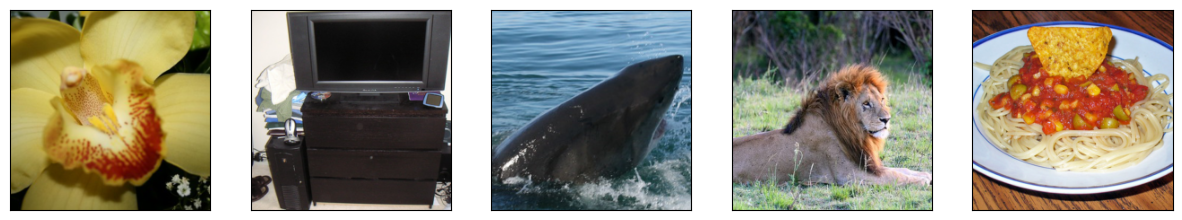

In [17]:
# Plot the Data
# Plot with the pre process

hF, vHa = plt.subplots(nrows = 1, ncols = numImg, figsize = (3 * numImg, 6))

for ii, hA in enumerate(vHa.flat):
    mI = ski.io.imread(L_IMG_URL[ii])
    tI = oPreProcess(mI)
    mI = tI.numpy()
    mI = mI * vStd[:, None, None] + vMean[:, None, None]
    mI = np.transpose(mI, (1, 2, 0))
    hA.imshow(mI)
    hA.tick_params(axis = 'both', left = False, top = False, right = False, bottom = False, 
                   labelleft = False, labeltop = False, labelright = False, labelbottom = False)
    hA.grid(False)


## Inference by the Models

This section use the models to infer the class of the data.  
The models are loaded with pre trained weights.

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /home/vlad/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100.0%
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /home/vlad/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100.0%
Downloading: "https://download.pytorch.org/models/inception_v3_google-0cc3c7bd.pth" to /home/vlad/.cache/torch/hub/checkpoints/inception_v3_google-0cc3c7bd.pth
100.0%
Downloading: "https://download.pytorch.org/models/resnet152-f82ba261.pth" to /home/vlad/.cache/torch/hub/checkpoints/resnet152-f82ba261.pth
100.0%


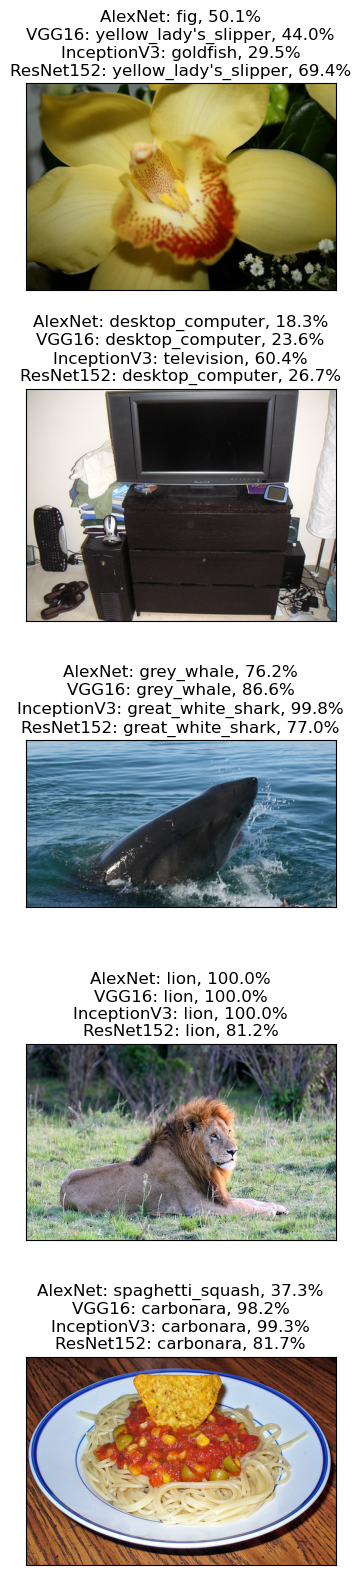

In [18]:
# Inference

hF, vHa = plt.subplots(nrows = numImg, ncols = 1, figsize = (4, 4 * numImg))

for ii, hA in enumerate(vHa.flat):
    mI = ski.io.imread(L_IMG_URL[ii])
    tI = oPreProcess(mI)
    tI = torch.unsqueeze(tI, 0)

    titleStr = ''

    for jj, (modelName, modelClass, modelWeights) in enumerate(lModels):
        
        oModel = modelClass(weights = modelWeights)         ## load the mode = load the weights !!!!
        oModel = oModel.eval()          #<! Batch Norm / Dropout Layers
        oModel = oModel.to('cpu')       ## Inference on the cpu 
        with torch.inference_mode():
            vYHat = torch.squeeze(oModel(tI))

        vProb   = torch.softmax(vYHat, dim = 0) #<! Probabilities  
        clsIdx  = torch.argmax(vYHat)
        clsProb = vProb[clsIdx] #<! Probability of the class

        titleStr += f'{modelName}: {lClasses[clsIdx]}, {clsProb:0.1%}'
        if ((jj + 1) < len(lModels)):
            titleStr += '\n'
    
    hA.imshow(mI)
    hA.tick_params(axis = 'both', left = False, top = False, right = False, bottom = False, 
                   labelleft = False, labeltop = False, labelright = False, labelbottom = False)
    hA.set_title(titleStr)
    hA.grid(False)

* <font color='red'>(**?**)</font> Models are trained for images of size `224x224`.  
  What will happen if we used pre trained model on images of `230x230`? What about `500x500` or `64x64`?
* <font color='red'>(**?**)</font> What's the meaning of the probability? Is it accurate?
* <font color='brown'>(**#**)</font>The Original GoogleNet has auxiliary logits which match `torchvision.models.googlenet(aux_logits = True)`.  
  See [GogoleNet Diagram](https://i.imgur.com/lQBp0Nz.png).